<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DAY5" data-toc-modified-id="DAY5-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DAY5</a></span><ul class="toc-item"><li><span><a href="#priceの対数化による精度の確認" data-toc-modified-id="priceの対数化による精度の確認-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>priceの対数化による精度の確認</a></span></li></ul></li><li><span><a href="#DAY6" data-toc-modified-id="DAY6-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DAY6</a></span><ul class="toc-item"><li><span><a href="#ランダムフォレスト：目的変数の選択についての確認" data-toc-modified-id="ランダムフォレスト：目的変数の選択についての確認-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ランダムフォレスト：目的変数の選択についての確認</a></span><ul class="toc-item"><li><span><a href="#すべての目的変数を選択してみる" data-toc-modified-id="すべての目的変数を選択してみる-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>すべての目的変数を選択してみる</a></span></li><li><span><a href="#年、月、曜日のダミー変数を追加してみる" data-toc-modified-id="年、月、曜日のダミー変数を追加してみる-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>年、月、曜日のダミー変数を追加してみる</a></span></li></ul></li><li><span><a href="#ランダムフォレスト：グリッドサーチによるパラメータチューニング" data-toc-modified-id="ランダムフォレスト：グリッドサーチによるパラメータチューニング-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>ランダムフォレスト：グリッドサーチによるパラメータチューニング</a></span></li></ul></li></ul></div>

# DAY5
## priceの対数化による精度の確認

In [53]:
%matplotlib inline
from IPython.core.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画
import itertools #組み合わせを求めるときに使う
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pyper #pyperとRを事前にインストールしておく必要がある
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from category_encoders import * # pip install category_encoders

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <a list of 10 Patch objects>)

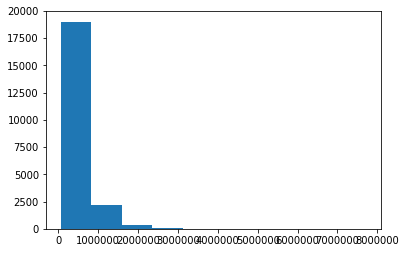

In [54]:
# priceのヒストグラム
df = pd.read_csv("kc_house_data.csv")
plt.hist(df["price"])

(array([6.300e+01, 5.330e+02, 3.977e+03, 7.183e+03, 6.345e+03, 2.541e+03,
        7.330e+02, 1.930e+02, 3.800e+01, 7.000e+00]),
 array([11.22524339, 11.68839214, 12.15154089, 12.61468964, 13.07783839,
        13.54098714, 14.00413589, 14.46728464, 14.93043339, 15.39358214,
        15.85673089]),
 <a list of 10 Patch objects>)

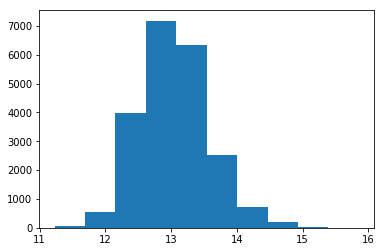

In [55]:
# 対数のヒストグラム
df_log = pd.read_csv("kc_house_data.csv")
df_log["price"] = df_log["price"].map(lambda x: np.log(x))
plt.hist(df_log["price"])

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <a list of 10 Patch objects>)

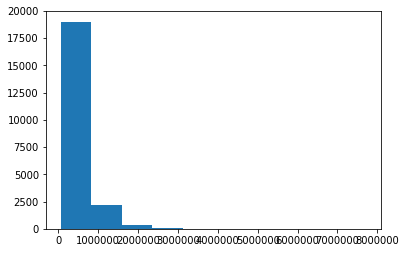

In [56]:
# 念のため元に戻して同じになるか確認
df = df_log
df["price"] = df["price"].map(lambda x: np.exp(x))
plt.hist(df["price"])

以下の4パターンで確認
- 線形回帰、ランダムフォレスト回帰
- 通常price、対数化price

In [57]:
# (1)線形回帰、通常price
df = pd.read_csv("kc_house_data.csv")
X = df.drop(["id", "price", "zipcode", "date", "sqft_living"], axis=1)
y = df["price"]

# データを訓練データ80%、テストデータ20%に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線形回帰
regr = LinearRegression()
regr.fit(X_train, y_train)

# 訓練データでの学習、MAEの計算
y_pred = regr.predict(X_train)
display(y_pred[:10])
mae = mean_absolute_error(y_train, y_pred)
print(" Train MAE: %s"%round(mae,3))
score = regr.score(X_train, y_train)
print(" Train SCR: %s"%round(score,3))

# テストデータでMAEの計算
y_pred = regr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(" Test  MAE: %s"%round(mae,3))
score = regr.score(X_test, y_test)
print(" Test  SCR: %s"%round(score,3))

array([ 494097.57016755,  247982.2550895 ,  164117.49424183,
        363041.36909987,  536594.80677808,  472537.07525462,
        509181.30403286, 1059491.07360271,  541901.83197424,
        200981.07252076])

 Train MAE: 125369.435
 Train SCR: 0.695
 Test  MAE: 128157.32
 Test  SCR: 0.696


In [58]:
# (2)線形回帰、対数化price
df_log = pd.read_csv("kc_house_data.csv")
df_log["price"] = df_log["price"].apply( lambda x: np.log(x) ) # log関数で変換
X = df_log.drop(["id", "price", "zipcode", "date", "sqft_living"], axis=1)
y = df_log["price"]

# データを訓練データ80%、テストデータ20%に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線形回帰
regr = LinearRegression()
regr.fit(X_train, y_train)

# 訓練データでの学習、MAEの計算
y_pred = regr.predict(X_train)
mae = mean_absolute_error(np.exp(y_train), np.exp(y_pred))
print(" Train MAE: %s"%round(mae,3))
score = regr.score(X_train, y_train)
print(" Train SCR: %s"%round(score,3))

# テストデータでMAEの計算
y_pred = regr.predict(X_test)
mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
print(" Test  MAE: %s"%round(mae,3))
score = regr.score(X_test, y_test)
print(" Test  SCR: %s"%round(score,3))

 Train MAE: 110375.5
 Train SCR: 0.768
 Test  MAE: 118055.423
 Test  SCR: 0.768


In [59]:
# (3)ランダムフォレスト回帰、通常price
df = pd.read_csv("kc_house_data.csv")
X = df.drop(["id", "price", "zipcode", "date", "sqft_living"], axis=1)
y = df["price"]

# データを訓練データ80%、テストデータ20%に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線形回帰
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

# 訓練データでの学習、MAEの計算
y_pred = regr.predict(X_train)
display(y_pred[:10])
mae = mean_absolute_error(y_train, y_pred)
print(" Train MAE: %s"%round(mae,3))
score = regr.score(X_train, y_train)
print(" Train SCR: %s"%round(score,3))

# テストデータでMAEの計算
y_pred = regr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(" Test  MAE: %s"%round(mae,3))
score = regr.score(X_test, y_test)
print(" Test  SCR: %s"%round(score,3))

array([372250., 282000., 225720., 288000., 486900., 490250., 452750.,
       801300., 709350., 293300.])

 Train MAE: 29874.063
 Train SCR: 0.974
 Test  MAE: 77813.206
 Test  SCR: 0.857


In [60]:
# (4)ランダムフォレスト回帰、対数化price
df_log = pd.read_csv("kc_house_data.csv")
df_log["price"] = df_log["price"].apply( lambda x: np.log(x) ) # log関数で変換
X = df_log.drop(["id", "price", "zipcode", "date", "sqft_living"], axis=1)
y = df_log["price"]

# データを訓練データ80%、テストデータ20%に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線形回帰
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

# 訓練データでの学習、MAEの計算
y_pred = regr.predict(X_train)
display(y_pred[:10])
mae = mean_absolute_error(np.exp(y_train), np.exp(y_pred))
print(" Train MAE: %s"%round(mae,3))
score = regr.score(X_train, y_train)
print(" Train SCR: %s"%round(score,3))

# テストデータでMAEの計算
y_pred = regr.predict(X_test)
mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
print(" Test  MAE: %s"%round(mae,3))
score = regr.score(X_test, y_test)
print(" Test  SCR: %s"%round(score,3))

array([12.72963741, 12.50672442, 12.15346397, 12.56830476, 13.20141306,
       13.07285605, 13.02861321, 13.60200672, 13.32980705, 12.59844322])

 Train MAE: 31192.335
 Train SCR: 0.974
 Test  MAE: 79027.853
 Test  SCR: 0.873


(4)ランダムフォレスト回帰、対数化price

の結果が一番よさそう。
交差検証でも確認してみる。
cross_val_score
という便利な関数があるもよう。

In [61]:
# (1)線形回帰、通常price
df = pd.read_csv("kc_house_data.csv")
X = df.drop(["id", "price", "zipcode", "date", "sqft_living"], axis=1)
y = df["price"]

# 線形回帰
regr = LinearRegression()
scores = cross_val_score(regr, X, y, cv=10)
print("SCR: %s"%scores.mean())

SCR: 0.6908930054058809


In [66]:
# (2)線形回帰、対数化price
df_log = pd.read_csv("kc_house_data.csv")
df_log["price"] = df_log["price"].map(lambda x: np.log(x)) # log関数で変換
X = df_log.drop(["id", "price", "zipcode", "date", "sqft_living"], axis=1)
y = df_log["price"]

# 線形回帰
regr = LinearRegression()
scores = cross_val_score(regr, X, y, cv=10)
print("SCR: %s"%scores.mean())

SCR: 0.7639515268396393


In [63]:
# (3)ランダムフォレスト回帰、通常price
df = pd.read_csv("kc_house_data.csv")
X = df.drop(["id", "price", "zipcode", "date", "sqft_living"], axis=1)
y = df["price"]

# ランダムフォレスト回帰
regr = RandomForestRegressor()
scores = cross_val_score(regr, X, y, cv=10)
print("SCR: %s"%scores.mean())

SCR: 0.8490714878991519


In [65]:
# (4)ランダムフォレスト回帰、対数化price
df_log = pd.read_csv("kc_house_data.csv")
df_log["price"] = df_log["price"].map(lambda x: np.log(x)) # log関数で変換
X = df_log.drop(["id", "price", "zipcode", "date", "sqft_living"], axis=1)
y = df_log["price"]

# ランダムフォレスト回帰
regr = RandomForestRegressor()
scores = cross_val_score(regr, X, y, cv=10)
print("SCR: %s"%scores.mean())

SCR: 0.8731264037119667


交差検証でも、

(4)ランダムフォレスト回帰、対数化price

の結果が一番よいことが分かった。

# DAY6
## ランダムフォレスト：目的変数の選択についての確認
先週までは、ランダムフォレストの試行において、あまり考えずに線形回帰の目的変数のセットで試していた。
立ち戻って、目的変数について考え直してみる。

### すべての目的変数を選択してみる

In [102]:
# (4)ランダムフォレスト回帰、対数化price
df_log = pd.read_csv("kc_house_data.csv")
df_log["price"] = df_log["price"].map(lambda x: np.log(x)) # priceを対数変換
df_log["date"] = pd.to_datetime(df_log.date).map(lambda x:x.value) # dateをunix timeに変換

# price以外のすべてを採用する
X = df_log.drop(["price"], axis=1)
y = df_log["price"]

# ランダムフォレスト回帰
regr = RandomForestRegressor()
scores = cross_val_score(regr, X, y, cv=10)
print("SCR: %s"%scores.mean())

SCR: 0.8776124899366629


DAY5までのスコアは、

SCR: 0.8732878974448516

なので単純によくなっているようにみえる。

そこで、どの目的変数が効いているのかを確認する。

Training and Test: 
 Train MAE: 29975.781
 Train SCR: 0.977
 Test  MAE: 76514.109
 Test  SCR: 0.879
Feature importance: 
 id :  0.0079788168124001
 date :  0.011501856500079682
 bedrooms :  0.0024949665782391154
 bathrooms :  0.005366290275079963
 sqft_living :  0.1744861435631096
 sqft_lot :  0.014480350793040164
 floors :  0.0011872555757843676
 waterfront :  0.007136978769521107
 view :  0.007484683228903258
 condition :  0.004808095977743021
 grade :  0.347752294763987
 sqft_above :  0.012742884587413161
 sqft_basement :  0.002801734981992437
 yr_built :  0.02086662444891459
 yr_renovated :  0.0010263506252317534
 zipcode :  0.010729502669074752
 lat :  0.2882056431367833
 long :  0.04207981497946382
 sqft_living15 :  0.024305888430942814
 sqft_lot15 :  0.01256382330229601


Text(0,0.5,'Feature')

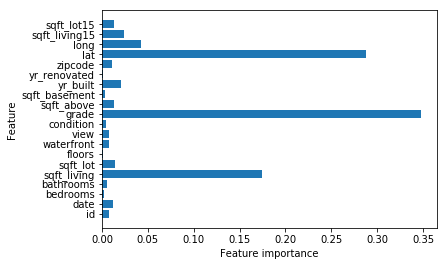

In [107]:
# (4)ランダムフォレスト回帰、対数化price
df_log = pd.read_csv("kc_house_data.csv")
df_log["price"] = df_log["price"].map(lambda x: np.log(x)) # priceを対数変換
df_log["date"] = pd.to_datetime(df_log.date).map(lambda x:x.value) # dateをunix timeに変換

# price以外のすべてを採用する
X = df_log.drop(["price"], axis=1)
y = df_log["price"]

# データを訓練データ80%、テストデータ20%に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレスト回帰
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

print("Training and Test: ")
# 訓練データでの学習、MAEの計算
y_pred = regr.predict(X_train)
mae = mean_absolute_error(np.exp(y_train), np.exp(y_pred))
print(" Train MAE: %s"%round(mae,3))
score = regr.score(X_train, y_train)
print(" Train SCR: %s"%round(score,3))

# テストデータでMAEの計算
y_pred = regr.predict(X_test)
mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
print(" Test  MAE: %s"%round(mae,3))
score = regr.score(X_test, y_test)
print(" Test  SCR: %s"%round(score,3))

print("Feature importance: ")
# 特徴量の重要度を取得
importance = regr.feature_importances_
for i, feat in enumerate(X.columns):
    print("", X.columns[i], ": ", importance[i])

#plot
n_features = X.shape[1]
plt.barh(range(n_features), regr.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

- grade、lat、sqft_livingの順に重要度が高いことが分かる。
- idやzipcodeはなにか特定の順序で並んでいる訳ではないと思われるが多少評価されている


### 年、月、曜日のダミー変数を追加してみる

In [111]:
# (4)ランダムフォレスト回帰、対数化price
df = pd.read_csv("kc_house_data.csv")
df["price"] = df["price"].map(lambda x: np.log(x)) # priceを対数変換
df["date"] = pd.to_datetime(df.date).map(lambda x:x.value) # dateをunix timeに変換

# year、dow、monthのエンコーディング
df_tmp = pd.DataFrame()
df_tmp['dow'] = pd.to_datetime(df.date).map(lambda x:'dow'+str(x.weekday()))
df_tmp['month'] = pd.to_datetime(df.date).map(lambda x:'month'+str(x.month))
df_tmp['year'] = pd.to_datetime(df.date).map(lambda x:'month'+str(x.year))
df = pd.concat([df,pd.get_dummies(df_tmp.dow)],axis=1)
df = pd.concat([df,pd.get_dummies(df_tmp.month)],axis=1)
df = pd.concat([df,pd.get_dummies(df_tmp.year)],axis=1)

# price以外のすべてを採用する
X = df.drop(["price"], axis=1)
y = df["price"]

# ランダムフォレスト回帰
regr = RandomForestRegressor()
scores = cross_val_score(regr, X, y, cv=10)
print("SCR: %s"%scores.mean())

SCR: 0.8767663028627165


- なぜか若干悪くなっている。あまり効果はない
- 目的変数の選択については、単にすべての変数を採用するのがよいようだ
- ターゲットエンコーディングについては、やり方が分からず、まだ試せてない

## ランダムフォレスト：グリッドサーチによるパラメータチューニング

In [114]:
# (4)ランダムフォレスト回帰、対数化price
df_log = pd.read_csv("kc_house_data.csv")
df_log["price"] = df_log["price"].map(lambda x: np.log(x)) # priceを対数変換
df_log["date"] = pd.to_datetime(df_log.date).map(lambda x:x.value) # dateをunix timeに変換

# price以外のすべてを採用する
X = df_log.drop(["price"], axis=1)
y = df_log["price"]

# bootstrapやmax_leaf_nodesはあまり効果がなかったのでコメントアウトした
parameters = {
    'n_estimators'      : [10, 100, 300], # default: 10
#    'bootstrap': [True, False],
    'n_jobs'            : [-1], # 高速化のため
#    'max_leaf_nodes': [10000000], 
    'max_features'      : ["auto", "log2", "sqrt"], # default: "auto"
}

clf = GridSearchCV(RandomForestRegressor(), parameters)
clf.fit(X, y)
 
print(clf.best_estimator_)
print(clf.best_score_)
#print(clf.cv_results_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
0.8876841843046636


- 若干スコアはよくなった
- n_estimatorは増やせば増やすほどスコアがよいようだが、これ以上増やしても計算時間がかかるだけであまり効果がない
- max_featuresはデフォルト値のautoが採用された
- パラメータチューニングの結論としては、n_estimatorを適度に増やすのがよいと思われる

参考：clf.cv_results_の出力結果

In [116]:
clf.cv_results_

C:\Users\yuji-yamaguchi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\yuji-yamaguchi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\yuji-yamaguchi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
 

{'mean_fit_time': array([ 0.63028908,  4.99711164, 14.99443261,  0.26567332,  1.3240215 ,
         4.0165271 ,  0.25518926,  1.28011807,  3.99644796]),
 'mean_score_time': array([0.12123934, 0.11096168, 0.33336409, 0.10937961, 0.11980089,
        0.33097935, 0.12621069, 0.14585567, 0.33334978]),
 'mean_test_score': array([0.87411718, 0.88645222, 0.88768418, 0.86513332, 0.88309225,
        0.8850206 , 0.86679604, 0.88411779, 0.8854823 ]),
 'mean_train_score': array([0.97767266, 0.9840829 , 0.984705  , 0.97464554, 0.98330644,
        0.9841007 , 0.97454574, 0.98353911, 0.98413704]),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'log2', 'log2', 'log2', 'sqrt',
                    'sqrt', 'sqrt'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 100, 300, 10, 100, 300, 10, 100, 300],
              mask=[False, False, Fa